In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
%matplotlib inline

In [2]:
data = pd.read_csv('pokemon.csv')

### BUILDING DATA FRAMES FROM SCRATCH


- We can build data frames from csv as we did earlier.
- Also we can build dataframe from dictionaries
   - zip() method: This function returns a list of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables.
- Adding new column
- Broadcasting: Create new column and assign a value to entire column

In [3]:
# data frames from dictionary
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,population
0,Spain,11
1,France,12


In [4]:
# Add new columns
df["capital"] = ["madrid","paris"]
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


In [5]:
# Broadcasting
df["income"] = 0 #Broadcasting entire column
df

,country,population,capital,income
0,Spain,11,madrid,0
1,France,12,paris,0


### VISUAL EXPLORATORY DATA ANALYSIS

- Plot
- Subplot
- Histogram:
  - bins: number of bins
  - range(tuple): min and max values of bins
  - normed(boolean): normalize or not
  - cumulative(boolean): compute cumulative distribution

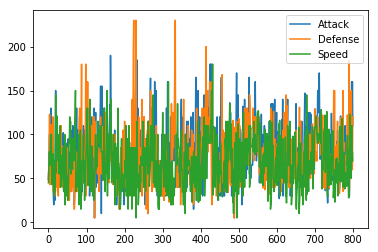

In [6]:
# Plotting all data 
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2759f8af90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2759df2e10>], dtype=object)

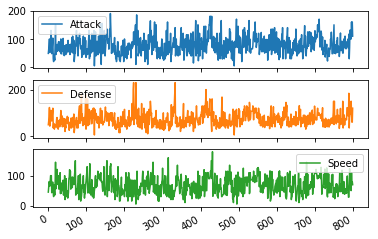

In [7]:
# subplots
data1.plot(subplots = True)

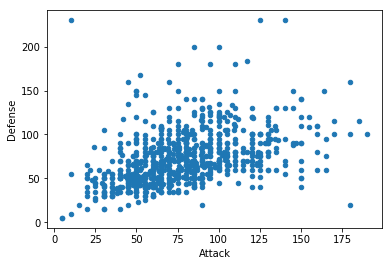

In [8]:
# scatter plot  
data1.plot(kind = "scatter",x="Attack",y = "Defense")

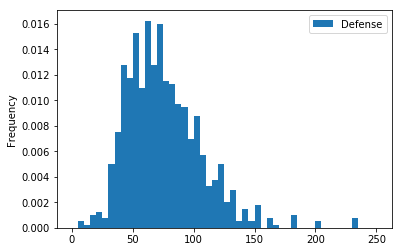

In [9]:
# histogram plot  
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True)

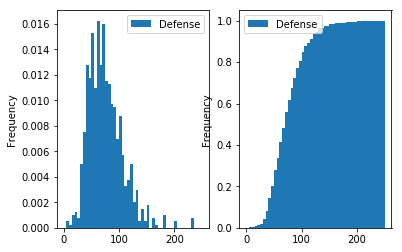

In [11]:
# histogram subplot with non cumulative and cumulative
fig, axes = ply.subplots(nrows=1,ncols=2)
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[1],cumulative = True)

### STATISTICAL EXPLORATORY DATA ANALYSIS

- count: number of entries
- mean: average of entries
- std: standart deviation
- min: minimum entry
- 25%: first quantile
- 50%: median or second quantile
- 75%: third quantile
- max: maximum entry

In [12]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### INDEXING PANDAS TIME SERIES

- datetime = object
- parse_dates(boolean): Transform date to ISO 8601 (yyyy-mm-dd hh:mm:ss ) format

In [14]:
time_list = ["1992-03-08","1992-04-12"]
print type(time_list[1]) # As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(time_list)
print type(datetime_object)

<type 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [15]:
# In order to practice lets take head of pokemon data and add it a time list
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
# lets make date as index
data2= data2.set_index("date")
data2 


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [16]:
# Now we can select according to our date index
print data2.loc["1993-03-16"]
print data2.loc["1992-03-10":"1993-03-16"]

#                      5
Name          Charmander
Type 1              Fire
Type 2               NaN
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed                 65
Generation             1
Legendary          False
Name: 1993-03-16 00:00:00, dtype: object
            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire     NaN  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary  
date                                               
1992-03-10      100     80           1      False  
1993-03-15      120     80           1      False  
1993-03-16       50     65           1      False  


### RESAMPLING PANDAS TIME SERIES

- Resampling: statistical method over different time intervals
  - Needs string to specify frequency like "M" = month or "A" = year
- Downsampling: reduce date time rows to slower frequency like from daily to weekly
- Upsampling: increase date time rows to faster frequency like from daily to hourly
- Interpolate: Interpolate values according to different methods like ‘linear’, ‘time’ or index’
   - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html

In [17]:
# We will use data2 that we create at previous part
data2.resample("A").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,2.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,False
1993-12-31,4.5,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,False


In [18]:
# Lets resample with month
data2.resample("M").mean()
# As you can see there are a lot of nan because data2 does not include all months

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# In real life (data is real. Not created from us like data2) we can solve this problem with interpolate
# We can interpolete from first value
data2.resample("M").first().interpolate("linear")

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-31,1.000000,Bulbasaur,Grass,Poison,45.0,49.0,49.000000,65.000000,65.000000,45.0,1.0,0.0
1992-02-29,2.000000,Ivysaur,Grass,Poison,60.0,62.0,63.000000,80.000000,80.000000,60.0,1.0,0.0
1992-03-31,3.000000,Venusaur,Grass,Poison,80.0,82.0,83.000000,100.000000,100.000000,80.0,1.0,0.0
1992-04-30,3.083333,NaN,NaN,NaN,80.0,83.5,86.333333,101.833333,101.666667,80.0,1.0,0.0
1992-05-31,3.166667,NaN,NaN,NaN,80.0,85.0,89.666667,103.666667,103.333333,80.0,1.0,0.0
1992-06-30,3.250000,NaN,NaN,NaN,80.0,86.5,93.000000,105.500000,105.000000,80.0,1.0,0.0
1992-07-31,3.333333,NaN,NaN,NaN,80.0,88.0,96.333333,107.333333,106.666667,80.0,1.0,0.0
1992-08-31,3.416667,NaN,NaN,NaN,80.0,89.5,99.666667,109.166667,108.333333,80.0,1.0,0.0
1992-09-30,3.500000,NaN,NaN,NaN,80.0,91.0,103.000000,111.000000,110.000000,80.0,1.0,0.0


### MANIPULATING DATA FRAMES WITH PANDAS

#### INDEXING DATA FRAMES

- Indexing using square brackets
- Using column attribute and row label
- Using loc accessor
- Selecting only some columns

In [20]:
# read data
data = pd.read_csv('pokemon.csv')
data= data.set_index("#")
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [21]:
# indexing using square brackets
data["HP"][1]

45

In [22]:
# using column attribute and row label
data.HP[1]

45

In [23]:
# using loc accessor
data.loc[1,["HP"]]

HP    45
Name: 1, dtype: object

In [24]:
# Selecting only some columns
data[["HP","Attack"]]

,HP,Attack
#,,
1,45,49
2,60,62
3,80,82
4,80,100
5,39,52
6,58,64
7,78,84
8,78,130
9,78,104


### SLICING DATA FRAME

- Difference between selecting columns
  - Series and data frames
- Slicing and indexing series
- Reverse slicing
- From something to end

In [25]:
# Difference between selecting columns: series and dataframes
print type(data["HP"])    # series
print type(data[["HP"]])   # data frames

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [26]:
# Slicing and indexing series
data.loc[10:20,"HP":"Defense"]   # 10 and "Defense" are inclusive

,HP,Attack,Defense
#,,,
10,44,48,65
11,59,63,80
12,79,83,100
13,79,103,120
14,45,30,35
15,50,20,55
16,60,45,50
17,40,35,30
18,45,25,50


In [27]:
# Reverse slicing 
data.loc[10:1:-1,"HP":"Defense"] 

,HP,Attack,Defense
#,,,
10,44,48,65
9,78,104,78
8,78,130,111
7,78,84,78
6,58,64,58
5,39,52,43
4,80,100,123
3,80,82,83
2,60,62,63


### FILTERING DATA FRAMES

Creating boolean series Combining filters Filtering column based others

In [28]:
# Creating boolean series
boolean = data.HP > 200
data[boolean]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False


In [29]:
# Combining filters
first_filter = data.HP > 150
second_filter = data.Speed > 35
data[first_filter & second_filter]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
352,Wailord,Water,NaN,170,90,45,90,45,60,3,False
656,Alomomola,Water,NaN,165,75,80,40,45,65,5,False


In [30]:
data.HP[data.Speed<15] # Filtering column based others

#
231     20
360     45
487     50
496    135
659     44
Name: HP, dtype: int64

### TRANSFORMING DATA

- Plain python functions
- Lambda function: to apply arbitrary python function to every element
- Defining column using other columns

In [31]:
# Plain python functions
def div(n):
    return n/2
data.HP.apply(div)

#
1      22
2      30
3      40
4      40
5      19
6      29
7      39
8      39
9      39
10     22
11     29
12     39
13     39
14     22
15     25
16     30
17     20
18     22
19     32
20     32
21     20
22     31
23     41
24     41
25     15
26     27
27     20
28     32
29     17
30     30
       ..
771    47
772    39
773    33
774    25
775    22
776    34
777    45
778    28
779    21
780    42
781    24
782    22
783    27
784    29
785    32
786    27
787    37
788    42
789    27
790    47
791    20
792    42
793    63
794    63
795    54
796    25
797    25
798    40
799    40
800    40
Name: HP, Length: 800, dtype: int64

In [32]:
#We can use lambda function for the same
data.HP.apply(lambda n : n/2)

#
1      22
2      30
3      40
4      40
5      19
6      29
7      39
8      39
9      39
10     22
11     29
12     39
13     39
14     22
15     25
16     30
17     20
18     22
19     32
20     32
21     20
22     31
23     41
24     41
25     15
26     27
27     20
28     32
29     17
30     30
       ..
771    47
772    39
773    33
774    25
775    22
776    34
777    45
778    28
779    21
780    42
781    24
782    22
783    27
784    29
785    32
786    27
787    37
788    42
789    27
790    47
791    20
792    42
793    63
794    63
795    54
796    25
797    25
798    40
799    40
800    40
Name: HP, Length: 800, dtype: int64

In [33]:
# Defining column using other columns
data["total_power"] = data.Attack + data.Defense
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95
